In [1]:
#Abhi Vinnakota
#Stroke Prediction Analysis

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Dataset

In [3]:
stroke_df = pd.read_csv("./healthcare-dataset-stroke-data.csv") #reading the data file
stroke_df['smoking_status'].replace('Unknown', np.nan, inplace=True) #replacing unknown values in smoking status column with NaN
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [4]:
print(stroke_df['stroke'].value_counts(), '\n')  #counting the amount of stroke values vs missing values or NaN
print(stroke_df['stroke'].value_counts(normalize=True)) #percent of stroke values vs missing values
print("Samples:", stroke_df.shape[0]) #number of total samples

0    4861
1     249
Name: stroke, dtype: int64 

0    0.951272
1    0.048728
Name: stroke, dtype: float64
Samples: 5110


### Therefore, there are 5110 total stroke data samples, with only about 5% or 249 being positive stroke results. These rows are valuable, and it would be detrimental to remove these rows when cleaning the data. 

In [5]:
stroke_df.isna().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

### Since the smoking_status feature has 1544 missing values, which is more than 20 percent of the total samples, it would not be beneficial to remove just those missing rows. Instead, removing the entire smoking_status feature may result in a better analysis. Similarly, removing the bmi column entirely would also be useful. It would not help to remove all of these missing value rows, because they may contain many of the positive stroke results, which would negatively impact the classification. For this reason, we decided to drop both smoking_status and bmi, even though these are factors that could affect a stroke. 

# Preprocessing Steps

In [6]:
X = stroke_df.drop(['id', 'ever_married', 'bmi', 'smoking_status', 'work_type', 'gender', 'Residence_type', 'stroke'], axis = 1)
y = stroke_df['stroke']

In [7]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level
0,67.0,0,1,228.69
1,61.0,0,0,202.21
2,80.0,0,1,105.92
3,49.0,0,0,171.23
4,79.0,1,0,174.12


### I chose these features for classification after considering which columns would be most useful. After observing that the bmi and smoking_status columns had many missing values, I decided to drop both of them because I did not want to sacrifice samples that could be useful during the classification. The id column was dropped because it was simply not needed. The rest of the columns were dropped because they did not seem very relevant to the stroke data. For example, even though one's work type could influence their chance of getting a stroke, it is an external factor that isn't a measure of someone's health. Therefore, I chose to exclude such features and instead focus on features such as age that have the most impact on the chance of a stroke. 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) #20 percent train test split

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Prediction of Stroke Occurrence with Classification:

## Method 1: KNeighbors Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
classifier = knn_clf.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[960   8]
 [ 53   1]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.11      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.53      0.51      0.50      1022
weighted avg       0.90      0.94      0.92      1022

0.9403131115459883


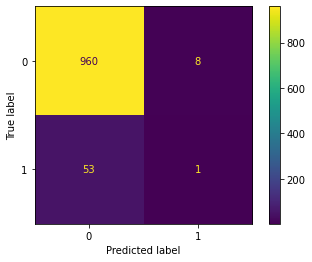

In [10]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test)  

### The KNeighbors Classifier correctly predicted 94% of the samples with a .94 accuracy value. This means that it correctly predicted 94 percent of the time that a patient would not get a stroke. Because the recall is is .99, there is a high number of true positives compared to false negatives. The precision at .95 is also very high, meaning there were a more true positives compared to false positives. A confusion matrix is also plotted above to visualize the overwhelming amount of true positives returned by the classifier. 

## Method 2: Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 42, n_estimators = 500)
classifier = rf_clf.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[947  21]
 [ 52   2]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       968
           1       0.09      0.04      0.05        54

    accuracy                           0.93      1022
   macro avg       0.52      0.51      0.51      1022
weighted avg       0.90      0.93      0.91      1022

0.9285714285714286


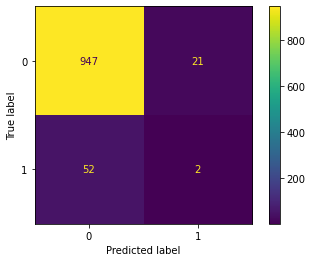

In [12]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test)  

### The Random Forest classifier had similar results to the KNeighbors classifier with a .98 recall score and .95 precision score. It ran almost as well as the KNeighbors but just a little bit worse. For this reason, I concluded that the KNeighbors classifier best predicted whether the patient had a stroke or not. As shown by the confusion matrix, the Random Forest classifier also did well at getting true positives. 

# Predicting Average Glucose Level with Regression:

## Preprocessing Steps

In [13]:
X = stroke_df.drop(['id', 'ever_married', 'bmi', 'smoking_status', 'work_type', 'gender', 'Residence_type', 'avg_glucose_level'], axis = 1)
y = stroke_df['avg_glucose_level']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

## KNeighbors Regression

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
regressor = knn_reg.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 33.99995107632093
Mean Squared Error: 2210.8032567866926
Root Mean Squared Error: 47.019179669435886


## Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 32.86718560133472
Mean Squared Error: 2045.9786443916448
Root Mean Squared Error: 45.232495447318016


## SVM Regression

In [16]:
from sklearn import svm
svm_reg = svm.SVR()

regressor = svm_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29.47888069259328
Mean Squared Error: 2112.4752513873273
Root Mean Squared Error: 45.961671546924045


### After running the three regression methods, I found that SVM regression returned the lowest Mean Absolute Error, meaning that it best predicted the average glucose level of a patient based on stroke occurence, age, and history of hypertension and heart disease. With a mean absolute error of about 29.5, the SVM regressor was able to predict the average glucose level of a patient with an error of 29.5 mmol/L. 

# Data Visualization of Stroke Patient Data:

## Data Clustering to find Insights/Correlations:

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

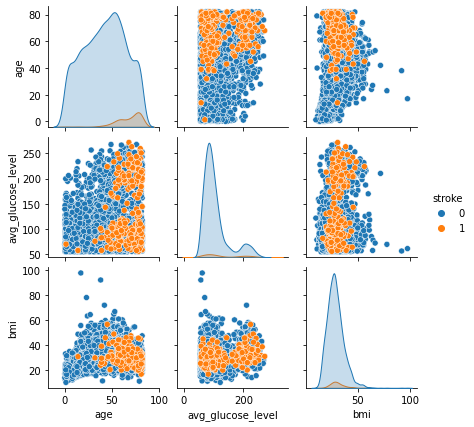

In [18]:
features = ['age', 'avg_glucose_level', 'bmi'] #these numerical columns are health factors that can affect stroke likelihood
sns.pairplot(stroke_df[['stroke'] + features].sort_values('stroke'), hue='stroke', height=2) #creating a pairplot for the stroke column

### The pairplot returned various plots which relate occurrence of a stroke to either BMI, age, or average glucose level. I concluded from the pairplot that age and glucose level have a large impact on stroke occurrence while BMI has the least impact. This is also supported by the clustering done below. 

In [19]:
X = stroke_df.drop(['id', 'ever_married', 'bmi', 'smoking_status', 'work_type', 'gender', 'Residence_type', 'stroke'], axis = 1)
y = stroke_df['stroke']

#dividing data into features and labels
features = X.filter(['age','avg_glucose_level'],axis = 1)
labels = y
#training KMeans model
features = features.values
km_model = KMeans(n_clusters = 2) #creating two clusters, one for positive stroke occurrence and one for negative
km_model.fit(features)

KMeans(n_clusters=2)

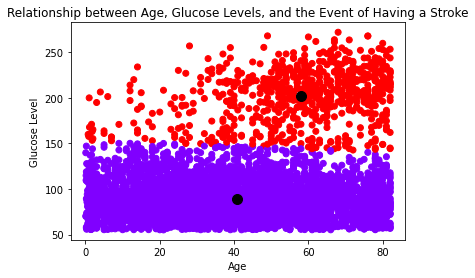

In [20]:
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.title('Relationship between Age, Glucose Levels, and the Event of Having a Stroke')

plt.scatter(features[:,0], features[:,1], c = km_model.labels_, cmap = 'rainbow')

plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s = 100, c = 'black')

### The first data clustering I ran was to find the relationship between age, average glucose level, and the occurence of a stroke. The points in red represent a patient who had a stroke, and the point in blue represent a patient who did not have a stroke. As you can see on the plot above, there seems to be a divide between the red and blue points around the 150 glucose level mark. This must mean there is a threshold where patients with glucose levels above 150 can have a stroke. I also noticed that the density of the red points increases as the age gets higher, which supports the conclusion that older people are more at risk for a stroke. 

In [21]:
stroke_df = stroke_df.dropna() #dropping all NaN values from BMI column
stroke_df = stroke_df.reset_index(drop=True)

stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [22]:
X = stroke_df.drop(['id', 'ever_married', 'smoking_status', 'work_type', 'gender', 'Residence_type', 'stroke'], axis = 1)
y = stroke_df['stroke']

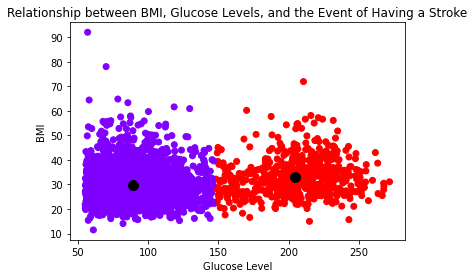

In [23]:
#dividing data into features and labels
features = X.filter(['avg_glucose_level','bmi'],axis = 1)
labels = y
#training KMeans model
features = features.values
km_model = KMeans(n_clusters = 2)
km_model.fit(features)
#print the data points
#plt.scatter(ages,glucose_levels, c = 'red')

plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.title('Relationship between BMI, Glucose Levels, and the Event of Having a Stroke')
#print the data points
plt.scatter(features[:,0], features[:,1], c = km_model.labels_, cmap = 'rainbow')

#print the centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c = 'black')

### After plotting clusters relating BMI to glucose level, I found a similar threshold at 150 mmol/L where patients above this level had a stroke. We also observed that the BMI didn't seem to have a large impact on the clustering, however it is interesting to note that the red cluster is most dense between 20 and 50 BMI. This either means that most of the patients were at this BMI level, or that stroke happen more frequenly at that level. 

# Conclusions

### Overall, I was happy with the results. With correlation I was able to predict the occurence of a stroke, with regression I was able to predict the glucose level based on stroke occurence and other factors, and finally with clustering I was able to visualize and prove which factors have the most impact in the likelihood of a stroke.